In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
cargo_dict = {
    "Day":[],
    "Source":[],
    "Destination":[],
    "Total Cargo":[],
    "Aircraft w/ Cargo":[],
    "Leftover Cargo":[],
    "Aircraft Repositioning":[],
    "Demand":[]
}
cargo_dict["Day"].extend([1]*6)
cargo_dict["Source"].extend(["A","C","A","B","B","C"])
cargo_dict["Destination"].extend(["B","B","C","C","A","A"])
cargo_dict["Total Cargo"].extend([275, 415, 50, 25, 25, 40])
cargo_dict["Aircraft w/ Cargo"].extend([185, 415, 50, 25, 25, 40])
cargo_dict["Demand"].extend([100, 400, 50, 25, 25, 40])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 185, 275, 0])

cargo_dict["Day"].extend([2]*6)
cargo_dict["Source"].extend(["A","C","A","B","B","C"])
cargo_dict["Destination"].extend(["B","B","C","C","A","A"])
cargo_dict["Total Cargo"].extend([290, 200, 50, 25, 25, 40])
cargo_dict["Aircraft w/ Cargo"].extend([290, 200, 50, 25, 25, 40])
cargo_dict["Demand"].extend([200, 200, 50, 25, 25, 40])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 485, 65, 20])

cargo_dict["Day"].extend([3]*6)
cargo_dict["Source"].extend(["A","C","A","B","B","C"])
cargo_dict["Destination"].extend(["B","B","C","C","A","A"])
cargo_dict["Total Cargo"].extend([100, 300, 50, 25, 25, 40])
cargo_dict["Aircraft w/ Cargo"].extend([100, 300, 50, 25, 25, 40])
cargo_dict["Demand"].extend([100, 300, 50, 25, 25, 40])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 275,165,220])

cargo_dict["Day"].extend([4]*6)
cargo_dict["Source"].extend(["A","C","A","B","B","C"])
cargo_dict["Destination"].extend(["B","B","C","C","A","A"])
cargo_dict["Total Cargo"].extend([400, 200, 50, 25, 25, 40])
cargo_dict["Aircraft w/ Cargo"].extend([400, 200, 50, 25, 25, 40])
cargo_dict["Demand"].extend([400, 200, 50, 25, 25, 40])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 350, 0, 110])

cargo_dict["Day"].extend([5]*6)
cargo_dict["Source"].extend(["A","C","A","B","B","C"])
cargo_dict["Destination"].extend(["B","B","C","C","A","A"])
cargo_dict["Total Cargo"].extend([300, 400, 50, 25, 25, 40])
cargo_dict["Aircraft w/ Cargo"].extend([125, 385, 50, 25, 25, 40])
cargo_dict["Demand"].extend([300, 400, 50, 25, 25, 40])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 380, 170, 0])

cargo_dict["Leftover Cargo"].extend([0]*6*5)

cargo_df = pd.DataFrame.from_dict(cargo_dict)
cargo_df

,Day,Source,Destination,Total Cargo,Aircraft w/ Cargo,Leftover Cargo,Aircraft Repositioning,Demand
0,1,A,B,275,185,0,0,100
1,1,C,B,415,415,0,0,400
2,1,A,C,50,50,0,0,50
3,1,B,C,25,25,0,185,25
4,1,B,A,25,25,0,275,25
5,1,C,A,40,40,0,0,40
6,2,A,B,290,290,0,0,200
7,2,C,B,200,200,0,0,200
8,2,A,C,50,50,0,0,50
9,2,B,C,25,25,0,485,25


In [114]:
leftover_cargo = []
for d in range(2,6):
    curr_df = cargo_df[cargo_df["Day"]==d]
    prev_df = cargo_df[cargo_df["Day"]==d-1]
    leftovers = prev_df["Total Cargo"] - prev_df["Aircraft w/ Cargo"]
    cargo_df.loc[curr_df.index,"Leftover Cargo"] = leftovers.values

curr_df = cargo_df[cargo_df["Day"]==1]
prev_df = cargo_df[cargo_df["Day"]==5]
leftovers = prev_df["Total Cargo"] - prev_df["Aircraft w/ Cargo"]
cargo_df.loc[curr_df.index,"Leftover Cargo"] = leftovers.values

cargo_df["Route"] = [row.Source+row.Destination for _,row in cargo_df.iterrows()]
cargo_df[""] = [row.Source+row.Destination for _,row in cargo_df.iterrows()]

In [115]:
cargo_df.head()

,Day,Source,Destination,Total Cargo,Aircraft w/ Cargo,Leftover Cargo,Aircraft Repositioning,Demand,Route,
0,1,A,B,275,185,175,0,100,AB,AB
1,1,C,B,415,415,15,0,400,CB,CB
2,1,A,C,50,50,0,0,50,AC,AC
3,1,B,C,25,25,0,185,25,BC,BC
4,1,B,A,25,25,0,275,25,BA,BA


In [116]:
cargo_df.sort_values(by="Source",ascending=True,inplace=True)

#### Are we meeting demand?

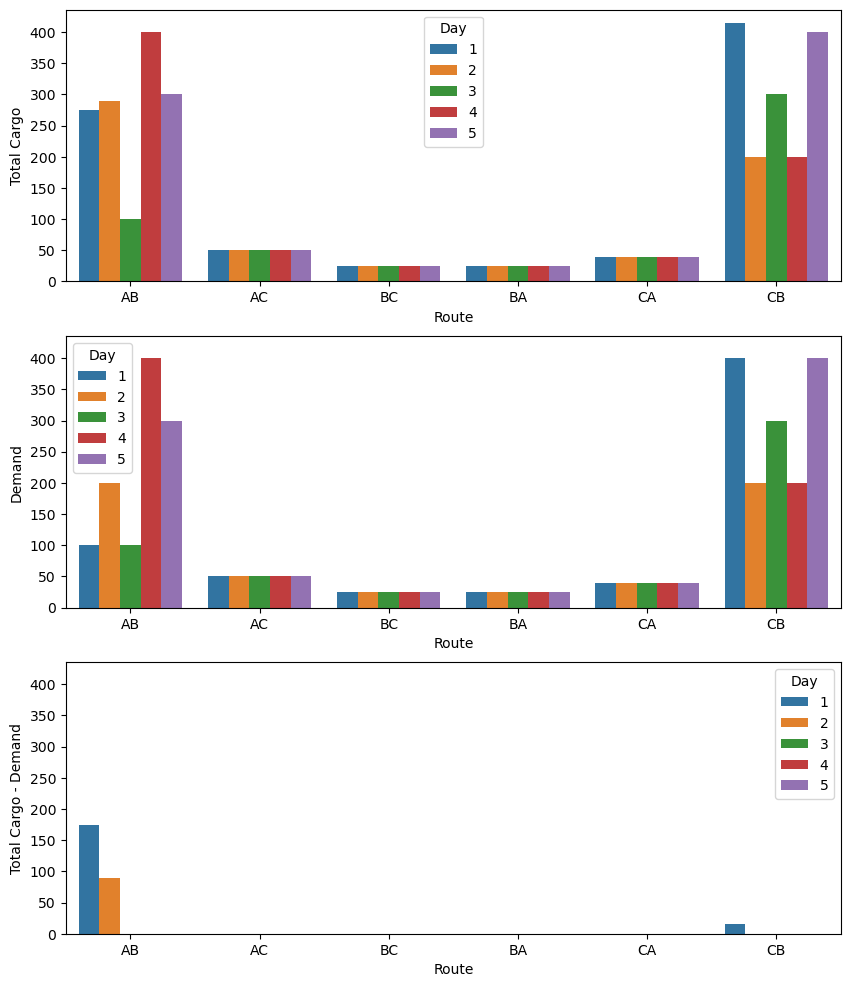

In [117]:
df = cargo_df.copy()
df["Total Cargo - Demand"] = df["Total Cargo"] - df["Demand"]

fig,axes = plt.subplots(3,1,figsize=(10,12),sharey=True)
sns.barplot(data=df, x="Route", y="Total Cargo", hue="Day", palette="tab10",ax=axes[0])
sns.barplot(data=df, x="Route", y="Demand", hue="Day", palette="tab10",ax=axes[1])
sns.barplot(data=df, x="Route", y="Total Cargo - Demand", hue="Day", palette="tab10",ax=axes[2])
plt.show()

#### Leftover cargo

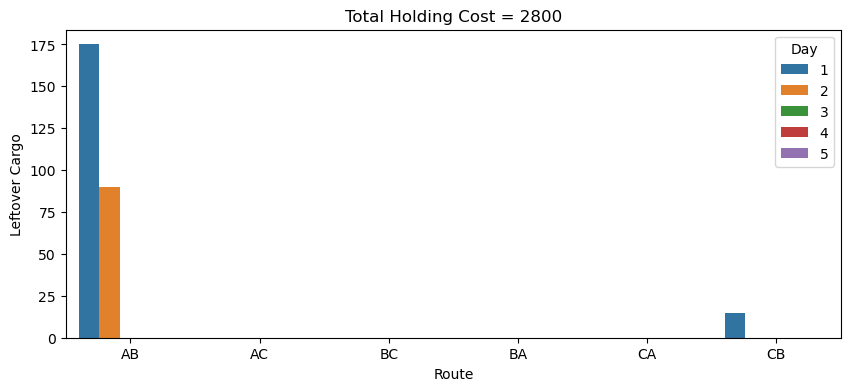

In [118]:
total_holding_cost = 10 * cargo_df["Leftover Cargo"].sum()

plt.figure(figsize=(10,4))
sns.barplot(data=cargo_df, x="Route",y="Leftover Cargo",hue="Day",palette="tab10")
plt.title(f"Total Holding Cost = {np.round(total_holding_cost,2)}")
plt.show()

#### Repositioning aircrafts

In [119]:
repos_cost = {
    "AB": 7.0,   # A->B
    "AC": 6.0,   # A->C
    "BA": 7.0,   # B->A
    "BC": 3.0,   # B->C
    "CA": 6.0,   # C->A
    "CB": 3.0,   # C->B
}

cargo_df["Repositioning Cost"] = [repos_cost[row.Route]*row["Aircraft Repositioning"] for _,row in cargo_df.iterrows()]

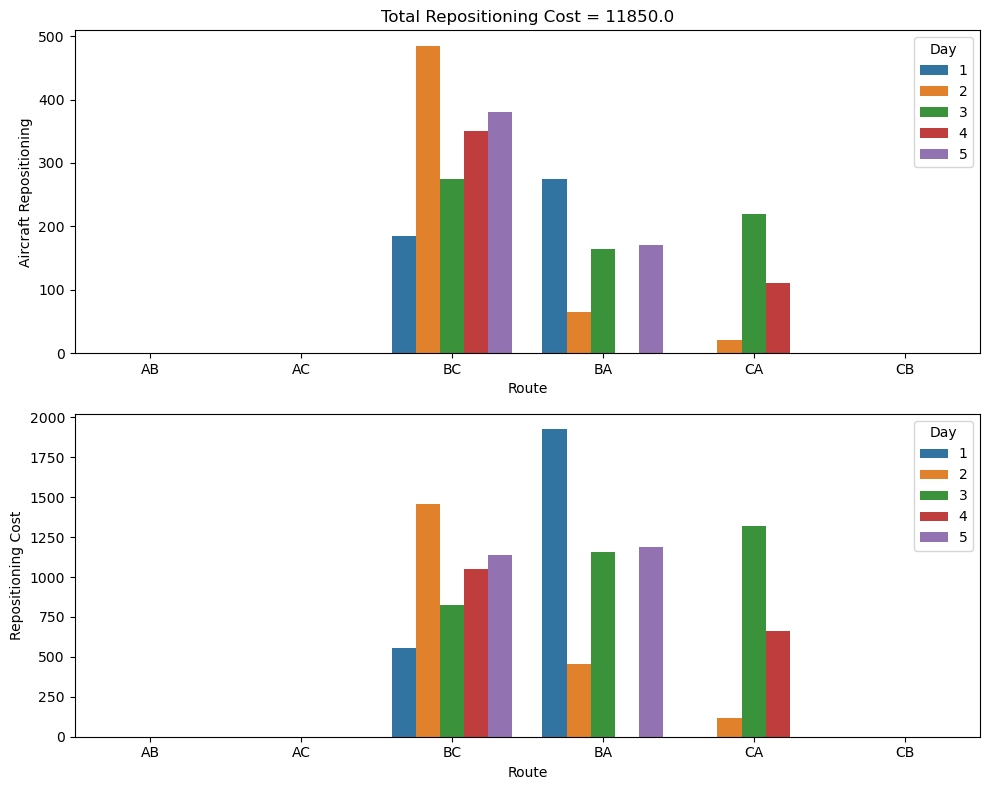

In [120]:
fig,axes = plt.subplots(2,1,figsize=(10,8))
sns.barplot(data=cargo_df, x="Route",y="Aircraft Repositioning",hue="Day",palette="tab10",ax=axes[0])
sns.barplot(data=cargo_df, x="Route",y="Repositioning Cost",hue="Day",palette="tab10",ax=axes[1])
axes[0].set_title(f"Total Repositioning Cost = {np.round(cargo_df["Repositioning Cost"].sum(), 2)}")
plt.tight_layout()
plt.show()

In [ ]:
cargo_df.groupby(by=["Source","Destination"],as_index=False).sum()

,Source,Destination,Day,Total Cargo,Aircraft w/ Cargo,Leftover Cargo,Aircraft Repositioning,Demand,Route,,Repositioning Cost
0,A,B,15,1365,1100,265,0,1100,ABABABABAB,ABABABABAB,0.0
1,A,C,15,250,250,0,0,250,ACACACACAC,ACACACACAC,0.0
2,B,A,15,125,125,0,675,125,BABABABABA,BABABABABA,4725.0
3,B,C,15,125,125,0,1675,125,BCBCBCBCBC,BCBCBCBCBC,5025.0
4,C,A,15,200,200,0,350,200,CACACACACA,CACACACACA,2100.0
5,C,B,15,1515,1500,15,0,1500,CBCBCBCBCB,CBCBCBCBCB,0.0


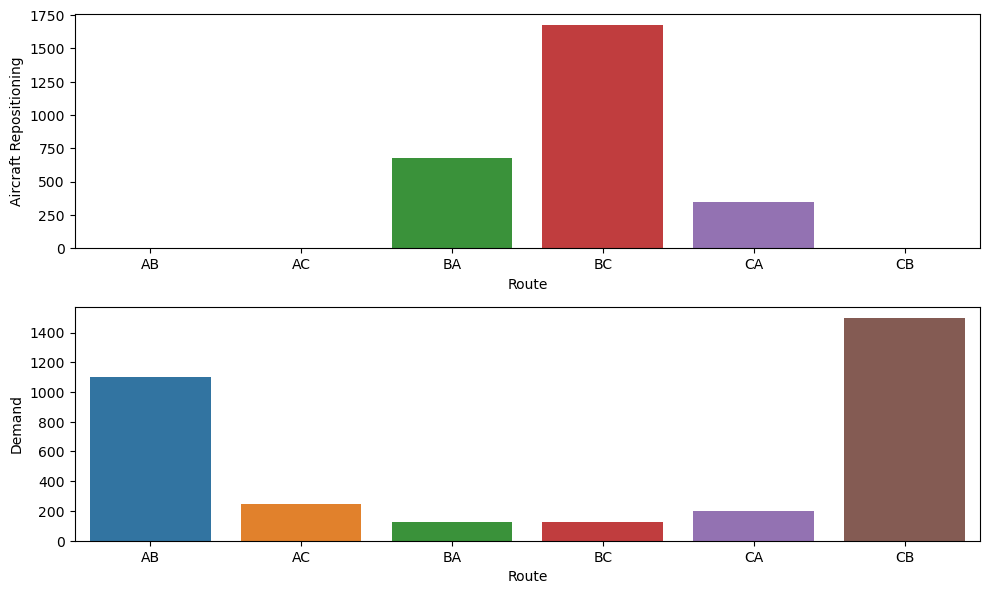

In [153]:
group_df = cargo_df.groupby(by=["Source","Destination"],as_index=False).sum()

fig,axes = plt.subplots(2,1,figsize=(10,6))
sns.barplot(data=group_df, x="Route", y="Aircraft Repositioning",hue="Route",ax=axes[0],palette="tab10")
axes[0].set_xticks(np.arange(6), ["AB","AC","BA","BC","CA","CB"])

sns.barplot(data=group_df, x="Route", y="Demand",hue="Route",ax=axes[1],palette="tab10")
axes[1].set_xticks(np.arange(6), ["AB","AC","BA","BC","CA","CB"])
plt.tight_layout()
plt.show()


#### Export results

In [122]:
cargo_df.to_csv("base_results.csv",index=False)